## Example Usage of Top Target Splitter

### Import Dependancies and load Dataset/Config

In [3]:
import os
from collections import Counter
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, Draw, rdFMCS
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from sklearn.decomposition import PCA

from geom3d.train_models import *
import torch
import copy
import os
os.chdir('/rds/general/user/cb1319/home/GEOM3D/Geom3D/')
config_dir = os.getcwd()+"/datasize_study/SchNet_opt_combined_80000"
config = read_config(config_dir)

dataset_path = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/datasize_study/80000dataset_combined.pt"
dataset = torch.load(dataset_path)

config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/datasize_study/SchNet_opt_combined_80000


### Example of top target Split on IP

In [12]:
import importlib
from geom3d.utils import top_target_split
from geom3d.utils.top_target_split import *

importlib.reload(top_target_split)

top_target_splitter(dataset, config)

top 10% in the test set. The target value is IP (5.5eV).


['KGGKNDUEDJTJOZ-VOVXCRLKSA-N',
 'GNKYEKXPAMMUCR-PMHDSTOGSA-N',
 'PASPOQDOZNPTJT-UHFFFAOYSA-N',
 'IFOHFOOEYUJWMY-YTJQMYRNSA-N',
 'IWLKHOBAEAUFHP-TZRCHIKKSA-N',
 'AYBCJSAAKGIQCP-FXJQXFMUSA-N',
 'LVNRICMRNRQHEJ-KVYSUAELSA-N',
 'QOCJGAGJVYEMSI-VLLXYDBRSA-N',
 'UVQGQEZNOXXJTJ-RCXMRBRQSA-N',
 'IXGJGUZWWVFBKO-RMOUTILPSA-N',
 'WERLSQHRQWZJNC-DPORGUCASA-N',
 'ILNMIUPLLRMUNK-FZPRHHONSA-N',
 'QEUHUASJNGLFOX-DKEBBPCISA-N',
 'IIYZVNMDJRZRNJ-RMOUTILPSA-N',
 'UHHANLBHIKNKMC-RZAAZZIUSA-N',
 'JTUWEIVWDWRBML-LEAOOLAISA-N',
 'YHGZABCPXYJPJK-IPHFVPNQSA-N',
 'CWGJCMLGMONALV-WOAKIUINSA-N',
 'OLHLBHJGBOCTKR-DIACVZSRSA-N',
 'UHCAIAJUZBVQGJ-NVQZDOMMSA-N',
 'AENPBZURNKMXDH-KFFOQRAHSA-N',
 'PDDDOCWOOCTJEG-XUOXJPJFSA-N',
 'YRXQFRYUTUOHIA-NXZPWOQSSA-N',
 'OAIOOOGNUFELPI-OTAFKVFBSA-N',
 'KTARXXZBNZBJTH-WIMUOEIGSA-N',
 'YMWQLJHQPXZOGY-HQUYMWSHSA-N',
 'FCHJPJRCZQMXRJ-ZCWAXRIBSA-N',
 'UINTZGYTEBXRRF-GLSLVLJQSA-N',
 'JMSZNGIOEYBEMS-ILVXIXLLSA-N',
 'LKOZLSIYGWQNFZ-UHFFFAOYSA-N',
 'JAYKESNLPJJMRO-RODHXAHZSA-N',
 'BGAUMU

### Subtructure analysis of top 10% of Targets

top 10% in the test set. The target value is IP (5.5eV).
target_name: IP


Generating substructures for top 10% wrt target:   0%|          | 0/8000 [00:00<?, ?it/s]

representative oligomer in top 10%


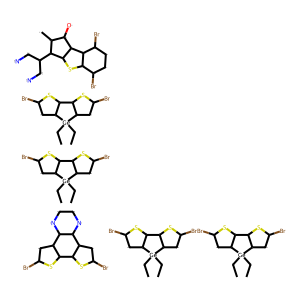

Generating substructures for top 10% wrt target: 100%|██████████| 8000/8000 [05:24<00:00, 24.67it/s]


Top 1 Substructure (Frequency: 2774 oligomers):


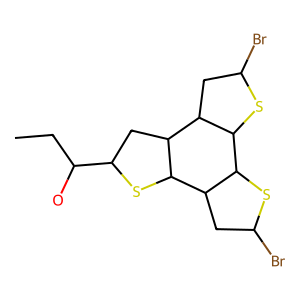

Top 2 Substructure (Frequency: 857 oligomers):


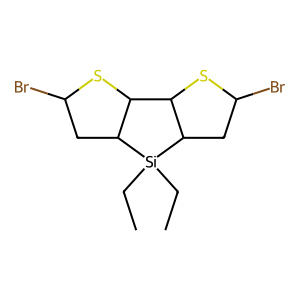

Top 3 Substructure (Frequency: 486 oligomers):


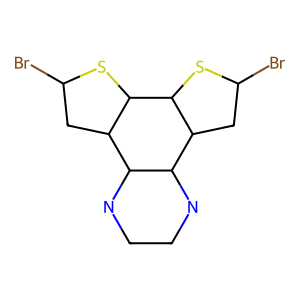

In [19]:
import importlib
from geom3d.utils import top_target_split
from geom3d.utils.top_target_split import *

importlib.reload(top_target_split)

substructure_analysis_top_target(dataset, config)

In [4]:
%matplotlib inline

### Plotting results on PCA of the dataset

Dataset file found in df_total
splitting group 1 10% of dataset into equal val and test set. The target value is IP.


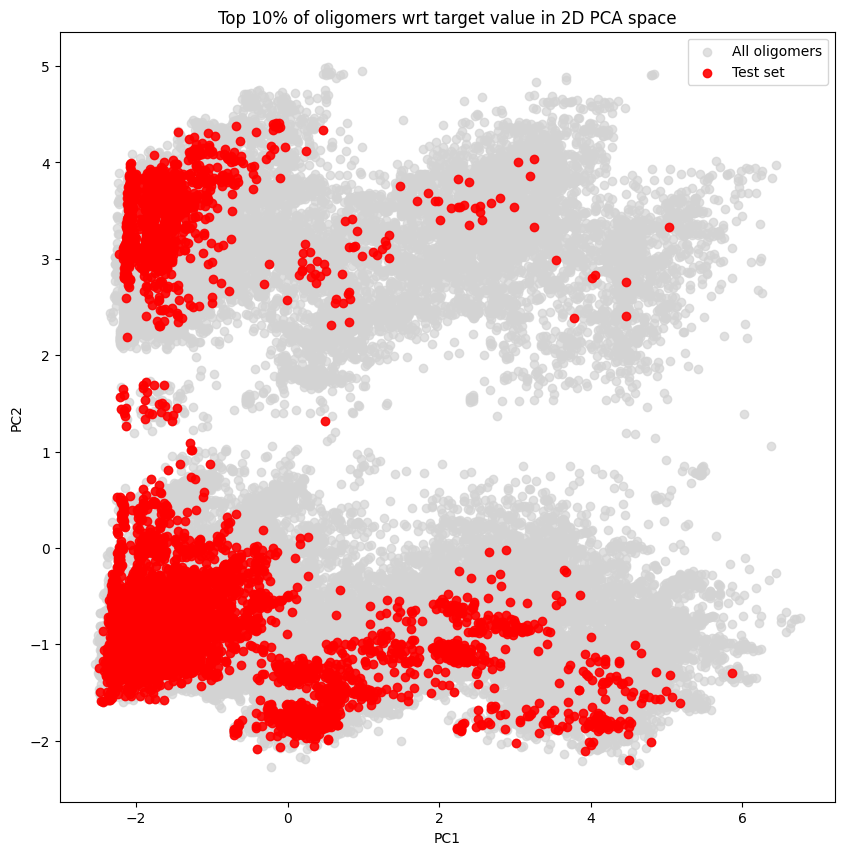

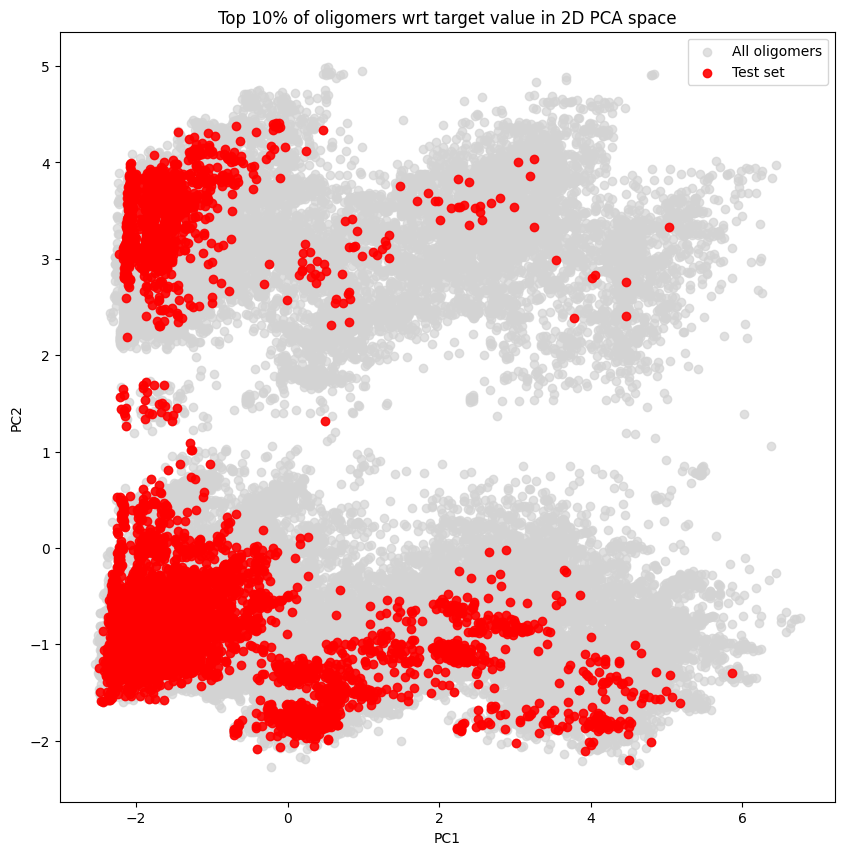

In [5]:
import importlib
from geom3d.utils import top_target_split
from geom3d.utils.top_target_split import *

importlib.reload(top_target_split)

target_plot(dataset, config)

In [5]:
import importlib
from geom3d.utils import top_target_split
from geom3d.utils.top_target_split import *

importlib.reload(top_target_split)

df_total, df_precursors, df_path, df_path_2, df_precursors_path = load_dataframes(dataset, config)
check_data_exists(df_total, dataset, config)
test_set_inchikeys = top_target_splitter(dataset, config)


Loading data from /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Full_dataset/df_total_subset_16_11_23_v2.csv and /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Prescursor_data/calculation_data_precursor_071123_clean.pkl
Dataset file found in df_total
putting group 1 10% of dataset into the test set, the rest are split randomly into val and train set. The target value is combined.


In [7]:
%matplotlib inline

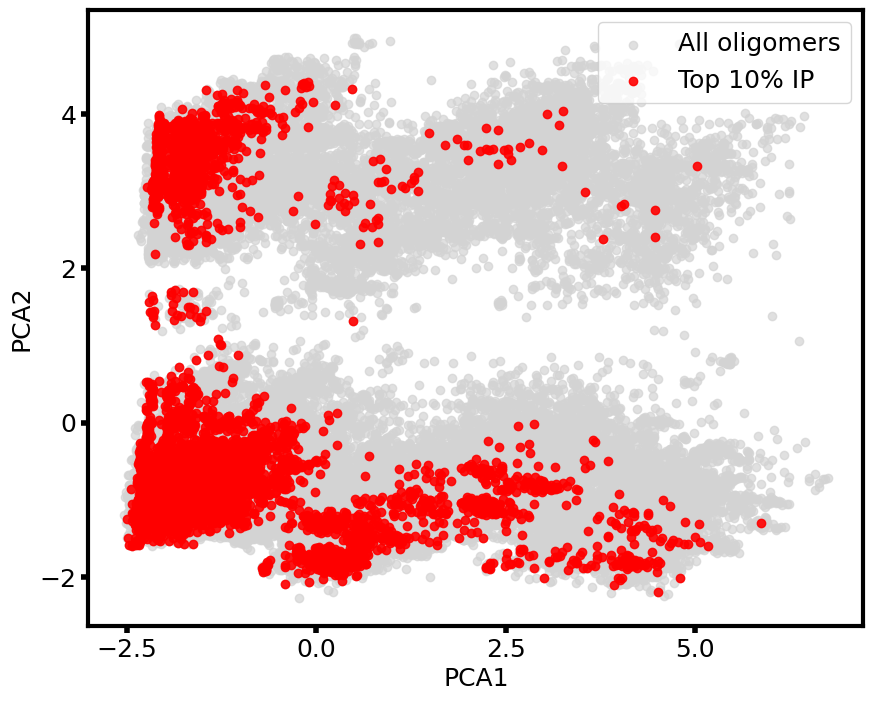

In [13]:
# Plot all clusters
plt.figure(figsize=(10, 8))
plt.scatter(df_total['2d_tani_pca_1'], df_total['2d_tani_pca_2'], alpha=0.7, label='All oligomers', c='lightgrey')
# Highlight the samples where df_total[InChIKey] is in test_set_inchikeys
plt.scatter(df_total.loc[df_total['InChIKey'].isin(test_set_inchikeys), '2d_tani_pca_1'], df_total.loc[df_total['InChIKey'].isin(test_set_inchikeys), '2d_tani_pca_2'], c='red', label='Top 10% IP', alpha=0.9)

plt.legend(fontsize=18, loc='upper right')
# plt.title("Top 10% IP Target", fontsize=18)
plt.xlabel("PCA1", fontsize=18)
plt.ylabel("PCA2", fontsize=18)

#make axes thicker
plt.gca().spines['top'].set_linewidth(3)
plt.gca().spines['right'].set_linewidth(3)
plt.gca().spines['bottom'].set_linewidth(3)
plt.gca().spines['left'].set_linewidth(3)

# Increase font size, make bold, and change to Aptos font
plt.tick_params(axis='both', which='major', labelsize=18)

# remove some ticks
plt.gca().xaxis.set_tick_params(width=4, size=5)
plt.gca().yaxis.set_tick_params(width=4, size=5)

# make less ticks
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(5))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(5))

plt.savefig(f'/rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment_2/top_target_cluster.png', dpi=400)
